### prophet projection for electricity index 

Importing plotly failed. Interactive plots will not work.
13:00:52 - cmdstanpy - INFO - Chain [1] start processing
13:00:52 - cmdstanpy - INFO - Chain [1] done processing
13:00:53 - cmdstanpy - INFO - Chain [1] start processing
13:00:53 - cmdstanpy - INFO - Chain [1] done processing


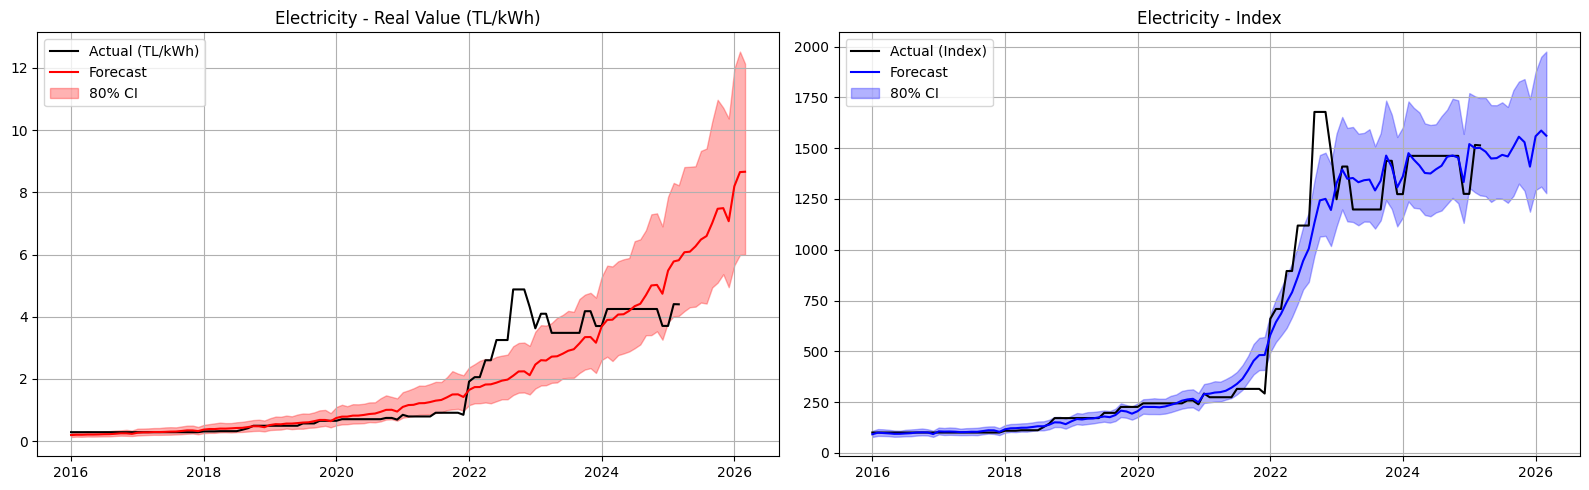

Tahmin edilen Electricity (TL/kWh) değerleri (son 12 ay):
[1482.64542678 1449.18473165 1451.27046515 1467.30456256 1459.33709585
 1506.97515165 1556.6630008  1529.55718862 1409.09954716 1558.71719538
 1586.81742105 1561.46427837]


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from pathlib import Path

# Dosya yolu
excel_path = Path("C:/Users/KGUELPI/OneDrive - Daimler Truck/Desktop/pure_data.xlsx")

# Veriyi oku
df = pd.read_excel(excel_path)
df["Date"] = pd.to_datetime(df["Date"])

### ----------- Elektrik Gerçek Değer (Log-Transform) ----------- ###
elec_real = df[["Date", "Electricity TL/kWh"]].copy()
elec_real = elec_real.rename(columns={"Date": "ds", "Electricity TL/kWh": "y"})
elec_real["y"] = np.log(elec_real["y"])  # Log dönüşüm

model_real = Prophet()
model_real.fit(elec_real)

future_real = model_real.make_future_dataframe(periods=12, freq="MS")
forecast_real = model_real.predict(future_real)

# Log dönüşümünü geri al
forecast_real["yhat"] = np.exp(forecast_real["yhat"])
forecast_real["yhat_lower"] = np.exp(forecast_real["yhat_lower"])
forecast_real["yhat_upper"] = np.exp(forecast_real["yhat_upper"])

# Gerçek veriyi de eski haline çevir (plot için)
elec_real_plot = df[["Date", "Electricity TL/kWh"]].copy()
elec_real_plot = elec_real_plot.rename(columns={"Date": "ds", "Electricity TL/kWh": "y"})

### ----------- Elektrik İndex (Log-Transform) ----------- ###
elec_index = df[["Date", "Electricindex"]].copy()
elec_index = elec_index.rename(columns={"Date": "ds", "Electricindex": "y"})
elec_index["y"] = np.log(elec_index["y"])

model_index = Prophet()
model_index.fit(elec_index)

future_index = model_index.make_future_dataframe(periods=12, freq="MS")
forecast_index = model_index.predict(future_index)

# Log dönüşümünü geri al
forecast_index["yhat"] = np.exp(forecast_index["yhat"])
forecast_index["yhat_lower"] = np.exp(forecast_index["yhat_lower"])
forecast_index["yhat_upper"] = np.exp(forecast_index["yhat_upper"])

# Gerçek veriyi de eski haline çevir (plot için)
elec_index_plot = df[["Date", "Electricindex"]].copy()
elec_index_plot = elec_index_plot.rename(columns={"Date": "ds", "Electricindex": "y"})

### ----------- Grafik ----------- ###
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Gerçek değer + CI
axs[0].plot(elec_real_plot['ds'], elec_real_plot['y'], label="Actual (TL/kWh)", color='black')
axs[0].plot(forecast_real['ds'], forecast_real['yhat'], label="Forecast", color='red')
axs[0].fill_between(forecast_real['ds'],
                    forecast_real['yhat_lower'],
                    forecast_real['yhat_upper'],
                    color='red', alpha=0.3, label='80% CI')
axs[0].set_title("Electricity - Real Value (TL/kWh)")
axs[0].legend()
axs[0].grid(True)

# Index değer + CI
axs[1].plot(elec_index_plot['ds'], elec_index_plot['y'], label="Actual (Index)", color='black')
axs[1].plot(forecast_index['ds'], forecast_index['yhat'], label="Forecast", color='blue')
axs[1].fill_between(forecast_index['ds'],
                    forecast_index['yhat_lower'],
                    forecast_index['yhat_upper'],
                    color='blue', alpha=0.3, label='80% CI')
axs[1].set_title("Electricity - Index")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()



yhat_electric_index = forecast_index["yhat"][-12:].values
print("Tahmin edilen Electricity (TL/kWh) değerleri (son 12 ay):")
print(yhat_electric_index)


### PPI Prophet projection

13:21:26 - cmdstanpy - INFO - Chain [1] start processing
13:21:26 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\KGUELPI\AppData\Roaming\Python\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
13:21:27 - cmdstanpy - INFO - Chain [1] start processing
13:21:27 - cmdstanpy - INFO - Chain [1] done processing


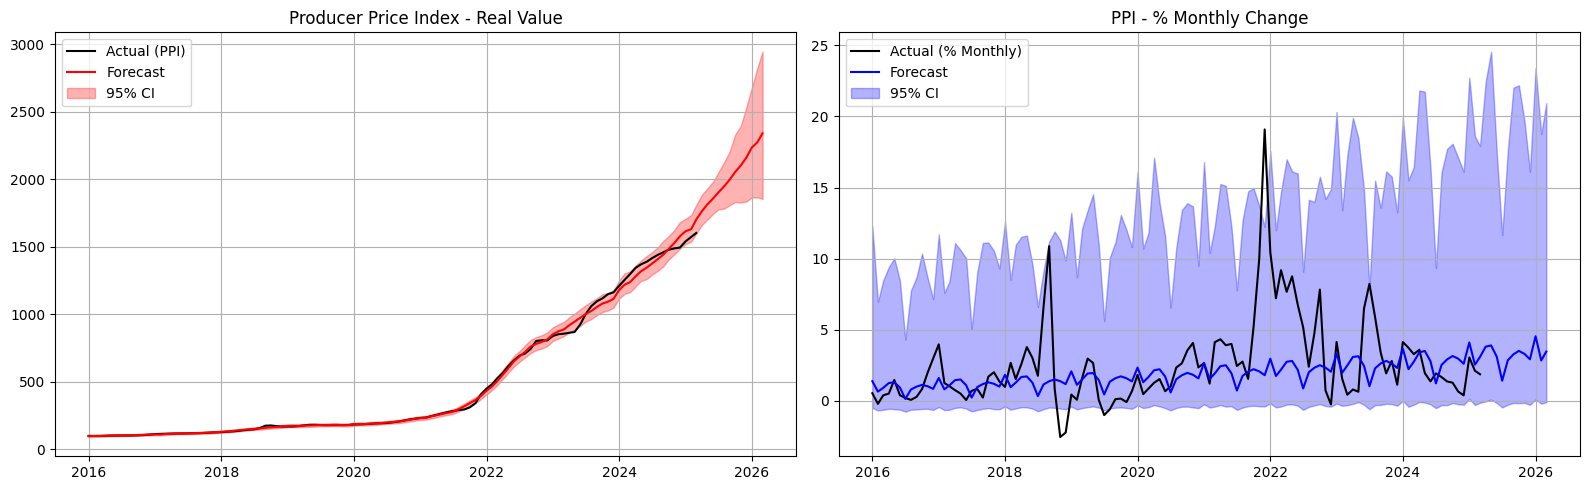

📈 Producer Price Index forecast (last 12 months):
[1762.84 1813.81 1856.53 1902.4  1946.75 1997.37 2052.82 2101.5  2158.36
 2234.59 2274.82 2340.33]

📊 PPI % Monthly Change forecast (last 12 months):
[381.6  390.54 311.8  142.4  285.93 327.84 352.03 330.93 292.94 455.02
 285.08 347.47]

✅ PPI Forecast (100-based Index, Last 12 Months):
[1809.5  1861.82 1905.66 1952.75 1998.27 2050.24 2107.15 2157.12 2215.49
 2293.73 2335.03 2402.27]


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from pathlib import Path

# Excel yolu
excel_path = Path("C:/Users/KGUELPI/OneDrive - Daimler Truck/Desktop/pure_data.xlsx")
df = pd.read_excel(excel_path)
df["Date"] = pd.to_datetime(df["Date"])

### ----------- PPI - Real Value (Log + 95% CI) ----------- ###
ppi_real = df[["Date", "ppi"]].copy()
ppi_real = ppi_real.rename(columns={"Date": "ds", "ppi": "y"})
ppi_real["y"] = np.log(ppi_real["y"])

model_real = Prophet(interval_width=0.95)
model_real.fit(ppi_real)

future_real = model_real.make_future_dataframe(periods=12, freq="MS")
forecast_real = model_real.predict(future_real)

# Log dönüşümünü geri al
forecast_real["yhat"] = np.exp(forecast_real["yhat"])
forecast_real["yhat_lower"] = np.exp(forecast_real["yhat_lower"])
forecast_real["yhat_upper"] = np.exp(forecast_real["yhat_upper"])

# 🔧 DÜZELTİLEN KISIM: Index oluştur
base_ppi = forecast_real["yhat"].iloc[0]
forecast_real["index"] = (forecast_real["yhat"] / base_ppi) * 100

# Gerçek veri (plot için)
ppi_real_plot = df[["Date", "ppi"]].copy()
ppi_real_plot = ppi_real_plot.rename(columns={"Date": "ds", "ppi": "y"})

### ----------- PPI - % Monthly Change (Log + 95% CI) ----------- ###
ppi_index = df[["Date", "PPI % Monthly"]].copy()
ppi_index = ppi_index.rename(columns={"Date": "ds", "PPI % Monthly": "y"})
ppi_index["y"] = np.log(ppi_index["y"] + 1)  # Negatiften kaçınmak için +1

model_index = Prophet(interval_width=0.95)
model_index.fit(ppi_index)

future_index = model_index.make_future_dataframe(periods=12, freq="MS")
forecast_index = model_index.predict(future_index)

forecast_index["yhat"] = np.exp(forecast_index["yhat"]) - 1
forecast_index["yhat_lower"] = np.exp(forecast_index["yhat_lower"]) - 1
forecast_index["yhat_upper"] = np.exp(forecast_index["yhat_upper"]) - 1

ppi_index_plot = df[["Date", "PPI % Monthly"]].copy()
ppi_index_plot = ppi_index_plot.rename(columns={"Date": "ds", "PPI % Monthly": "y"})

### ----------- Grafik ----------- ###
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Real Value
axs[0].plot(ppi_real_plot['ds'], ppi_real_plot['y'], label="Actual (PPI)", color='black')
axs[0].plot(forecast_real['ds'], forecast_real['yhat'], label="Forecast", color='red')
axs[0].fill_between(forecast_real['ds'],
                    forecast_real['yhat_lower'],
                    forecast_real['yhat_upper'],
                    color='red', alpha=0.3, label='95% CI')
axs[0].set_title("Producer Price Index - Real Value")
axs[0].legend()
axs[0].grid(True)

# % Monthly Change
axs[1].plot(ppi_index_plot['ds'], ppi_index_plot['y'], label="Actual (% Monthly)", color='black')
axs[1].plot(forecast_index['ds'], forecast_index['yhat'], label="Forecast", color='blue')
axs[1].fill_between(forecast_index['ds'],
                    forecast_index['yhat_lower'],
                    forecast_index['yhat_upper'],
                    color='blue', alpha=0.3, label='95% CI')
axs[1].set_title("PPI - % Monthly Change")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

### ----------- Dizi Formatında Tahmin Çıktıları ----------- ###
yhat_ppi = forecast_real["yhat"][-12:].values
yhat_ppi_index = forecast_real["index"][-12:].values
yhat_ppi_pct = forecast_index["yhat"][-12:].values

print("📈 Producer Price Index forecast (last 12 months):")
print(np.round(yhat_ppi, 2))

print("\n📊 PPI % Monthly Change forecast (last 12 months):")
print(np.round(yhat_ppi_pct * 100, 2))  # Yüzde olarak görmek istersen *100

print("\n✅ PPI Forecast (100-based Index, Last 12 Months):")
print(np.round(yhat_ppi_index, 2))


### gas

13:25:59 - cmdstanpy - INFO - Chain [1] start processing
13:25:59 - cmdstanpy - INFO - Chain [1] done processing
13:25:59 - cmdstanpy - INFO - Chain [1] start processing
13:25:59 - cmdstanpy - INFO - Chain [1] done processing


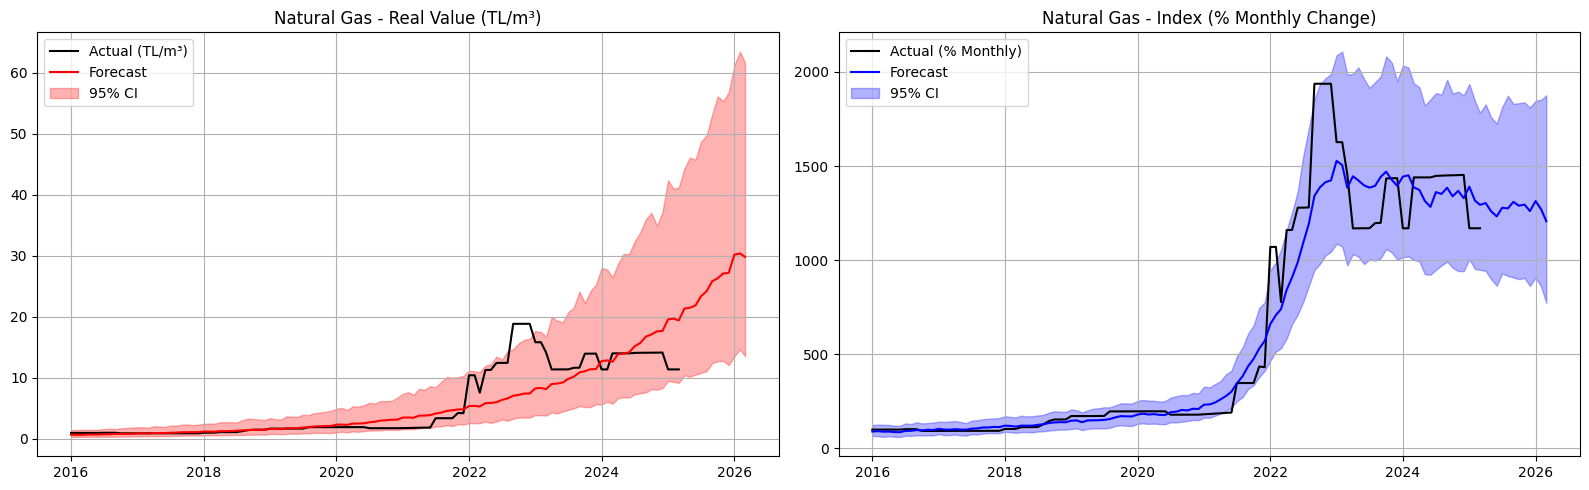

📈 Natural Gas forecast (last 12 months):
[21.35 21.48 21.86 23.34 24.18 25.81 26.31 27.11 27.18 30.18 30.39 29.81]

📊 Natural Gas % Monthly Change (last 12 months):
[130346.01 125971.7  123265.15 127853.4  127486.31 130974.12 128931.02
 129532.27 126073.52 131402.79 126946.03 120712.92]

✅ Natural Gas Forecast (100-based Index, Last 12 Months):
[3170.22 3190.46 3246.83 3466.67 3591.75 3833.31 3907.57 4026.55 4037.37
 4482.39 4512.93 4427.9 ]


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from pathlib import Path

# Excel dosyasını oku
excel_path = Path("C:/Users/KGUELPI/OneDrive - Daimler Truck/Desktop/pure_data.xlsx")
df = pd.read_excel(excel_path)
df["Date"] = pd.to_datetime(df["Date"])

### ----------- Gas Real Value (TL/m³) ----------- ###
gas_real = df[["Date", "Gastl"]].copy()
gas_real = gas_real.rename(columns={"Date": "ds", "Gastl": "y"})
gas_real["y"] = np.log(gas_real["y"])  # log-transform

model_real = Prophet(interval_width=0.95)
model_real.fit(gas_real)

future_real = model_real.make_future_dataframe(periods=12, freq="MS")
forecast_real = model_real.predict(future_real)

# Log dönüşümünü geri al
forecast_real["yhat"] = np.exp(forecast_real["yhat"])
forecast_real["yhat_lower"] = np.exp(forecast_real["yhat_lower"])
forecast_real["yhat_upper"] = np.exp(forecast_real["yhat_upper"])

# 🔧 Hata düzeltildi: doğru isimlendirme (forecast_real)
base_gas = forecast_real["yhat"].iloc[0]
forecast_real["index"] = (forecast_real["yhat"] / base_gas) * 100

# Gerçek veri plot için
gas_real_plot = df[["Date", "Gastl"]].copy()
gas_real_plot = gas_real_plot.rename(columns={"Date": "ds", "Gastl": "y"})

### ----------- Gas Index (% Monthly) ----------- ###
gas_index = df[["Date", "gi"]].copy()
gas_index = gas_index.rename(columns={"Date": "ds", "gi": "y"})
gas_index["y"] = np.log(gas_index["y"] + 1)  # log(1 + r) dönüşümü

model_index = Prophet(interval_width=0.95)
model_index.fit(gas_index)

future_index = model_index.make_future_dataframe(periods=12, freq="MS")
forecast_index = model_index.predict(future_index)

# Log dönüşümünü geri al
forecast_index["yhat"] = np.exp(forecast_index["yhat"]) - 1
forecast_index["yhat_lower"] = np.exp(forecast_index["yhat_lower"]) - 1
forecast_index["yhat_upper"] = np.exp(forecast_index["yhat_upper"]) - 1

gas_index_plot = df[["Date", "gi"]].copy()
gas_index_plot = gas_index_plot.rename(columns={"Date": "ds", "gi": "y"})

### ----------- Grafik ----------- ###
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Gerçek değer grafiği
axs[0].plot(gas_real_plot['ds'], gas_real_plot['y'], label="Actual (TL/m³)", color='black')
axs[0].plot(forecast_real['ds'], forecast_real['yhat'], label="Forecast", color='red')
axs[0].fill_between(forecast_real['ds'],
                    forecast_real['yhat_lower'],
                    forecast_real['yhat_upper'],
                    color='red', alpha=0.3, label='95% CI')
axs[0].set_title("Natural Gas - Real Value (TL/m³)")
axs[0].legend()
axs[0].grid(True)

# Index grafiği
axs[1].plot(gas_index_plot['ds'], gas_index_plot['y'], label="Actual (% Monthly)", color='black')
axs[1].plot(forecast_index['ds'], forecast_index['yhat'], label="Forecast", color='blue')
axs[1].fill_between(forecast_index['ds'],
                    forecast_index['yhat_lower'],
                    forecast_index['yhat_upper'],
                    color='blue', alpha=0.3, label='95% CI')
axs[1].set_title("Natural Gas - Index (% Monthly Change)")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

### ----------- Tahminler (Array Olarak) ----------- ###
yhat_gas = forecast_real["yhat"][-12:].values
yhat_gas_index = forecast_real["index"][-12:].values
yhat_gas_pct = forecast_index["yhat"][-12:].values

print("📈 Natural Gas forecast (last 12 months):")
print(np.round(yhat_gas, 2))

print("\n📊 Natural Gas % Monthly Change (last 12 months):")
print(np.round(yhat_gas_pct * 100, 2))

print("\n✅ Natural Gas Forecast (100-based Index, Last 12 Months):")
print(np.round(yhat_gas_index, 2))


### Labour cost prophet

13:24:44 - cmdstanpy - INFO - Chain [1] start processing
13:24:44 - cmdstanpy - INFO - Chain [1] done processing


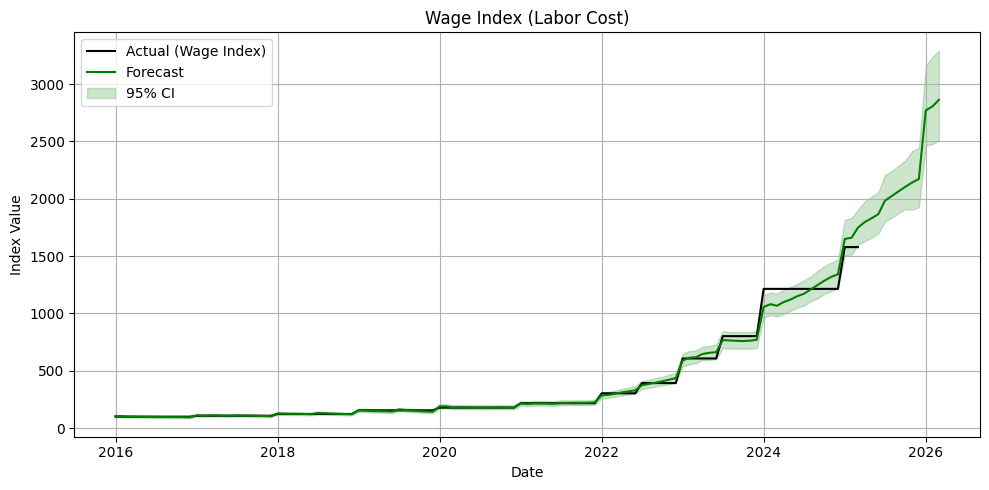

Labor Cost (Wage Index) forecast (last 12 months):
[1797.31459344 1829.44376544 1865.33889713 1983.92612866 2024.63216772
 2065.68429376 2104.58423327 2142.94068115 2172.51180077 2770.50261915
 2807.28159866 2863.13077085]


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from pathlib import Path

# Excel'den veriyi oku
excel_path = Path("C:/Users/KGUELPI/OneDrive - Daimler Truck/Desktop/pure_data.xlsx")
df = pd.read_excel(excel_path)
df["Date"] = pd.to_datetime(df["Date"])

### ----------- Wage Index (Log + %95 Confidence) ----------- ###
wage_index = df[["Date", "wage_index"]].copy()
wage_index = wage_index.rename(columns={"Date": "ds", "wage_index": "y"})
wage_index["y"] = np.log(wage_index["y"])

model = Prophet(interval_width=0.95)
model.fit(wage_index)

future = model.make_future_dataframe(periods=12, freq="MS")
forecast = model.predict(future)

# Log dönüşümünü geri al
forecast[["yhat", "yhat_lower", "yhat_upper"]] = np.exp(forecast[["yhat", "yhat_lower", "yhat_upper"]])

# Gerçek veri (plot için)
wage_index_plot = df[["Date", "wage_index"]].copy()
wage_index_plot = wage_index_plot.rename(columns={"Date": "ds", "wage_index": "y"})

### ----------- Grafik ----------- ###
plt.figure(figsize=(10, 5))
plt.plot(wage_index_plot['ds'], wage_index_plot['y'], label="Actual (Wage Index)", color='black')
plt.plot(forecast['ds'], forecast['yhat'], label="Forecast", color='green')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='green', alpha=0.2, label="95% CI")
plt.title("Wage Index (Labor Cost)")
plt.xlabel("Date")
plt.ylabel("Index Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

yhat_labor = forecast["yhat"][-12:].values
print("Labor Cost (Wage Index) forecast (last 12 months):")
print(yhat_labor)


### EUR/TL

13:24:47 - cmdstanpy - INFO - Chain [1] start processing
13:24:47 - cmdstanpy - INFO - Chain [1] done processing


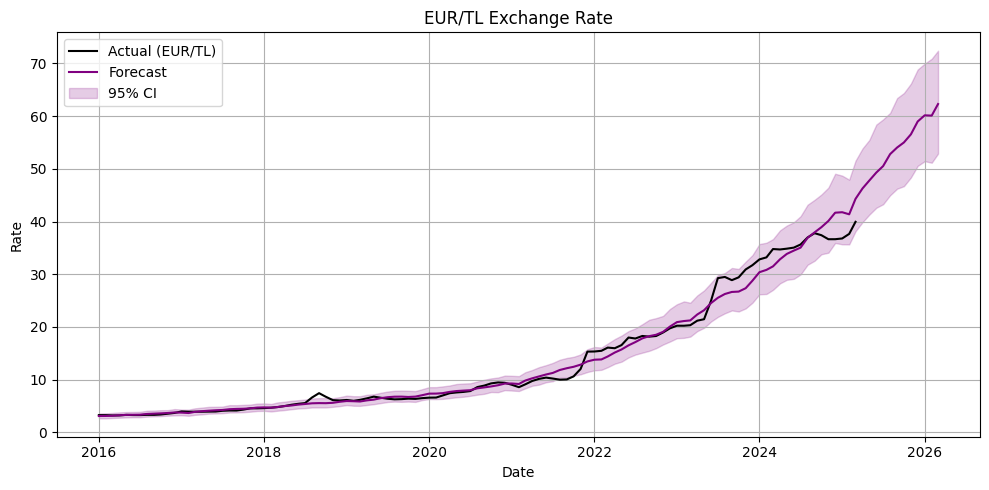

EUR/TL Forecast (Real Value, last 12 months):
[46.27 47.77 49.29 50.51 52.78 54.03 54.99 56.53 58.97 60.14 60.09 62.28]

EUR/TL Forecast (Index-based, base=100, last 12 months):
[1490.45 1538.63 1587.47 1626.74 1700.05 1740.36 1771.27 1820.92 1899.41
 1937.08 1935.33 2006.  ]


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from pathlib import Path

# Excel'den veri yükle
excel_path = Path("C:/Users/KGUELPI/OneDrive - Daimler Truck/Desktop/pure_data.xlsx")
df = pd.read_excel(excel_path)
df["Date"] = pd.to_datetime(df["Date"])

### ----------- EUR/TL (Log + %95 Confidence) ----------- ###
eur_tl = df[["Date", "eurtl"]].copy()
eur_tl = eur_tl.rename(columns={"Date": "ds", "eurtl": "y"})
eur_tl["y"] = np.log(eur_tl["y"])

model = Prophet(interval_width=0.95)
model.fit(eur_tl)

future = model.make_future_dataframe(periods=12, freq="MS")
forecast = model.predict(future)

# Log dönüşümünü geri al
forecast[["yhat", "yhat_lower", "yhat_upper"]] = np.exp(forecast[["yhat", "yhat_lower", "yhat_upper"]])

# --- 100 bazlı indeks hesapla ---
base = forecast["yhat"].iloc[0]  # ilk tahmin edilen değeri 100 kabul et
forecast["index"] = (forecast["yhat"] / base) * 100

# Son 12 ayın hem gerçek tahmini hem indeks tahmini
yhat_eur = forecast["yhat"][-12:].values
yhat_eur_index = forecast["index"][-12:].values

# Gerçek veri (plot için)
eur_tl_plot = df[["Date", "eurtl"]].copy()
eur_tl_plot = eur_tl_plot.rename(columns={"Date": "ds", "eurtl": "y"})

### ----------- Grafik ----------- ###
plt.figure(figsize=(10, 5))
plt.plot(eur_tl_plot['ds'], eur_tl_plot['y'], label="Actual (EUR/TL)", color='black')
plt.plot(forecast['ds'], forecast['yhat'], label="Forecast", color='purple')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='purple', alpha=0.2, label="95% CI")
plt.title("EUR/TL Exchange Rate")
plt.xlabel("Date")
plt.ylabel("Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Yazdır
print("EUR/TL Forecast (Real Value, last 12 months):")
print(np.round(yhat_eur, 2))

print("\nEUR/TL Forecast (Index-based, base=100, last 12 months):")
print(np.round(yhat_eur_index, 2))


### live graph by weights 

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
import warnings
warnings.filterwarnings("ignore")

# Tarihler: 2025 Nisan - 2026 Mart
months = pd.date_range("2025-04-01", periods=12, freq="MS")

# Prophet'ten gelen 12 aylık tahmini yhat index değerleri
feature_forecasts = {
    "Electricity": np.array([1482.64542678, 1449.18473165, 1451.27046515, 1467.30456256, 1459.33709585,
                             1506.97515165, 1556.6630008, 1529.55718862, 1409.09954716, 1558.71719538,
                             1586.81742105, 1561.46427837]),
    "PPI":         np.array([1809.5, 1861.82, 1905.66, 1952.75, 1998.27, 2050.24, 2107.15, 2157.12, 2215.49,
                             2293.73, 2335.03, 2402.27]),
    "Gas":         np.array([3170.22, 3190.46, 3246.83, 3466.67, 3591.75, 3833.31, 3907.57, 4026.55, 4037.37,
                             4482.39, 4512.93, 4427.9]),
    "Wage":        np.array([1797.31459344, 1829.44376544, 1865.33889713, 1983.92612866, 2024.63216772,
                             2065.68429376, 2104.58423327, 2142.94068115, 2172.51180077, 2770.50261915,
                             2807.28159866, 2863.13077085]),
    "EUR/TL":      np.array([1490.45, 1538.63, 1587.47, 1626.74, 1700.05, 1740.36, 1771.27, 1820.92, 1899.41,
                             1937.08, 1935.33, 2006.0])
}

# Interaktif grafik + tablo fonksiyonu
def interactive_total_cost(electricity_w=0.08, ppi_w=0.19, gas_w=0.02, wage_w=0.20, eur_w=0.51):
    weights = {
        "Electricity": electricity_w,
        "PPI": ppi_w,
        "Gas": gas_w,
        "Wage": wage_w,
        "EUR/TL": eur_w
    }

    total_weight = sum(weights.values())
    if not np.isclose(total_weight, 1.0):
        print(f"⚠️ Total weight = {total_weight:.2f}. It's recommended to normalize to 1.0")

    # Toplam maliyet indexi hesapla
    total_cost = np.zeros(12)
    for key in feature_forecasts:
        total_cost += weights[key] * feature_forecasts[key]

    # DataFrame oluştur
    df = pd.DataFrame({
        "Date": months,
        "Total Cost Index": total_cost
    }).set_index("Date")

    # Tabloyu göster
    display(df)

    # Grafiği çiz
    plt.figure(figsize=(10, 5))
    plt.plot(df.index, df["Total Cost Index"], color='darkgreen', linewidth=2.5, label="Total Cost Forecast")
    plt.title("📈 Total Cost Index (Forecast)")
    plt.xlabel("Date")
    plt.ylabel("Index Value")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Slider arayüzü
interact(
    interactive_total_cost,
    electricity_w=FloatSlider(value=0.08, min=0.00, max=0.3, step=0.01, description="Electricity"),
    ppi_w=FloatSlider(value=0.19, min=0.00, max=0.3, step=0.01, description="PPI"),
    gas_w=FloatSlider(value=0.02, min=0.00, max=0.1, step=0.01, description="Gas"),
    wage_w=FloatSlider(value=0.20, min=0.00, max=0.3, step=0.01, description="Wage"),
    eur_w=FloatSlider(value=0.51, min=0.00, max=1.0, step=0.01, description="EUR/TL")
)


interactive(children=(FloatSlider(value=0.08, description='Electricity', max=0.3, step=0.01), FloatSlider(valu…

<function __main__.interactive_total_cost(electricity_w=0.08, ppi_w=0.19, gas_w=0.02, wage_w=0.2, eur_w=0.51)>

### Doğan Abi için gereken arrayler


### user interface gui

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, Dropdown
from pathlib import Path
import warnings
warnings.filterwarnings("ignore")

# 1. Veriyi oku
excel_path = Path("C:/Users/KGUELPI/OneDrive - Daimler Truck/Desktop/pure_data.xlsx")
df = pd.read_excel(excel_path)
df["Date"] = pd.to_datetime(df["Date"])

# 2. Sadece gerçek veri dönemi: 2016-01 ile 2025-03 arası
real_data = df[(df["Date"] >= "2016-01-01") & (df["Date"] <= "2025-03-01")].copy()

# 3. Kullanacağımız feature'lar ve yeni isim eşlemesi
target_features = {
    "Electricity": "Electricindex",
    "PPI": "ppi",
    "Gas": "gi",
    "Wage": "wage_index",
    "EUR/TL": "eurtli"
}

# 4. Tüm feature'lar için normalize edilmemiş değerleri sakla
date_list = real_data["Date"].tolist()
feature_values = {
    feat_name: real_data[["Date", col_name]].dropna().set_index("Date")[col_name].values
    for feat_name, col_name in target_features.items()
}

# 5. Dropdown menüsü için tüm tarihleri al
all_dates_dropdown = [(d.strftime("%Y-%m"), i) for i, d in enumerate(date_list)]

# 6. Fonksiyon: base date'e göre normalize edilmiş index, % değişim ve plot
def show_feature_index(feature, base_index_pos, target_index_pos):
    raw_vals = feature_values[feature]
    base_val = raw_vals[base_index_pos]
    rebased_index = (raw_vals / base_val) * 100
    pct_change = ((raw_vals - base_val) / base_val) * 100

    df_out = pd.DataFrame({
        "Date": date_list,
        "Original": raw_vals.round(2),
        f"Index (Base={date_list[base_index_pos].strftime('%Y-%m')})": rebased_index.round(2),
        "% Change": pct_change.round(2)
    })

    display(df_out)

    # Karşılaştırma çıktısı
    target_date = date_list[target_index_pos]
    target_val = rebased_index[target_index_pos]
    target_pct = pct_change[target_index_pos]

    print(f"📌 Target Date: {target_date.strftime('%Y-%m')}")
    print(f"Index (Base={date_list[base_index_pos].strftime('%Y-%m')}) = {target_val:.2f}")
    print(f"→ % Change = {target_pct:.2f}%")

    # Grafik
    plt.figure(figsize=(10, 4))
    plt.plot(date_list, rebased_index, marker='o', label=f"{feature} Index")
    plt.axhline(100, color='gray', linestyle='--')
    plt.title(f"{feature} Index (Base = {date_list[base_index_pos].strftime('%Y-%m')})")
    plt.xlabel("Date")
    plt.ylabel("Index (Base=100)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# 7. Interact (2 dropdown: base ve target)
interact(
    show_feature_index,
    feature=Dropdown(options=list(target_features.keys()), description="Feature"),
    base_index_pos=Dropdown(options=all_dates_dropdown, description="Base Date"),
    target_index_pos=Dropdown(options=all_dates_dropdown, description="Target Date")
)


interactive(children=(Dropdown(description='Feature', options=('Electricity', 'PPI', 'Gas', 'Wage', 'EUR/TL'),…

<function __main__.show_feature_index(feature, base_index_pos, target_index_pos)>


### total cost

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, Dropdown, FloatSlider, VBox
from pathlib import Path
import warnings
warnings.filterwarnings("ignore")

# Dosya ve veri
excel_path = Path("C:/Users/KGUELPI/OneDrive - Daimler Truck/Desktop/pure_data.xlsx")
df = pd.read_excel(excel_path)
df["Date"] = pd.to_datetime(df["Date"])
real_data = df[(df["Date"] >= "2016-01-01") & (df["Date"] <= "2025-03-01")].copy()

# Feature eşleştirmeleri
target_features = {
    "Electricity": "Electricindex",
    "PPI": "ppi",
    "Gas": "gi",
    "Wage": "wage_index",
    "EUR/TL": "eurtli"
}

# Gerçek feature değerlerini topla
date_list = real_data["Date"].tolist()
feature_values = {
    name: real_data[["Date", col]].dropna().set_index("Date")[col].values
    for name, col in target_features.items()
}

# Tüm tarihleri dropdown'a koy
all_dates_dropdown = [(d.strftime("%Y-%m"), i) for i, d in enumerate(date_list)]

# Interaktif fonksiyon
def show_total_cost_index(base_index_pos, elec_w, ppi_w, gas_w, wage_w, euro_w):
    weights = {
        "Electricity": elec_w,
        "PPI": ppi_w,
        "Gas": gas_w,
        "Wage": wage_w,
        "EUR/TL": euro_w
    }
    
    # Toplam ağırlığı kontrol et
    total_weight = sum(weights.values())
    if abs(total_weight - 1.0) > 1e-4:
        print(f"⚠️ Total weight = {total_weight:.2f}. It's recommended to normalize to 1.0\n")
    
    # Her feature'ı normalize edip ağırlığıyla çarp
    base_vals = {}
    rebased = []
    for name, vals in feature_values.items():
        base_val = vals[base_index_pos]
        base_vals[name] = base_val
        index_vals = (vals / base_val) * 100
        weighted = index_vals * weights[name]
        rebased.append(weighted)
    
    # Toplam indeks serisi
    total_cost = np.sum(rebased, axis=0)
    pct_change = ((total_cost - 100) / 100) * 100  # base zaten 100 olacak

    df_out = pd.DataFrame({
        "Date": date_list,
        "Total Cost Index": total_cost.round(2),
        "% Change from Base": pct_change.round(2)
    })

    display(df_out)

    # Grafik
    plt.figure(figsize=(10, 4))
    plt.plot(date_list, total_cost, marker='o', label="Total Cost Index")
    plt.axhline(100, color='gray', linestyle='--')
    plt.title(f"Total Cost Index (Base = {date_list[base_index_pos].strftime('%Y-%m')})")
    plt.xlabel("Date")
    plt.ylabel("Cost Index (Base = 100)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Interaktif arayüz
interact(
    show_total_cost_index,
    base_index_pos=Dropdown(options=all_dates_dropdown, description="Base Date"),
    elec_w=FloatSlider(min=0, max=1, step=0.01, value=0.2, description="Electricity"),
    ppi_w=FloatSlider(min=0, max=1, step=0.01, value=0.2, description="PPI"),
    gas_w=FloatSlider(min=0, max=1, step=0.01, value=0.2, description="Gas"),
    wage_w=FloatSlider(min=0, max=1, step=0.01, value=0.2, description="Wage"),
    euro_w=FloatSlider(min=0, max=1, step=0.01, value=0.2, description="EUR/TL")
)


interactive(children=(Dropdown(description='Base Date', options=(('2016-01', 0), ('2016-02', 1), ('2016-03', 2…

<function __main__.show_total_cost_index(base_index_pos, elec_w, ppi_w, gas_w, wage_w, euro_w)>